**Situation:** AAL, an Australian clothing company, is growing and looking to expand its business.

**Task:** The Head of Sales needs to analyze fourth-quarter sales data to identify the highest and lowest-performing states. This will help the company decide where to invest and how to improve sales.

**Action:**
1.  Analyze sales data for each state from the fourth quarter.
2.  Identify the states generating the most revenue.
3.  Identify the states generating the least revenue.
4.  Provide insights and recommend sales programs based on the data.

**Result:** To provide a clear, data-driven analysis that helps AAL's management make informed decisions about where to expand and how to boost sales in underperforming areas for the upcoming year.

# Import required libs

In [61]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset into dataframe

In [62]:
df = pd.read_csv('../dataset/AusApparalSales4thQrt2020.csv')
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# Do some quick data analysis.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [64]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [65]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [66]:
#find all possible values for object columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].value_counts().index.tolist()}")

Date: ['1-Oct-2020', '2-Oct-2020', '3-Oct-2020', '4-Oct-2020', '5-Oct-2020', '6-Oct-2020', '7-Oct-2020', '8-Oct-2020', '9-Oct-2020', '10-Oct-2020', '11-Oct-2020', '12-Oct-2020', '13-Oct-2020', '14-Oct-2020', '15-Oct-2020', '16-Oct-2020', '17-Oct-2020', '18-Oct-2020', '19-Oct-2020', '20-Oct-2020', '21-Oct-2020', '22-Oct-2020', '23-Oct-2020', '24-Oct-2020', '25-Oct-2020', '26-Oct-2020', '27-Oct-2020', '28-Oct-2020', '29-Oct-2020', '30-Oct-2020', '1-Nov-2020', '2-Nov-2020', '3-Nov-2020', '4-Nov-2020', '5-Nov-2020', '6-Nov-2020', '7-Nov-2020', '8-Nov-2020', '9-Nov-2020', '10-Nov-2020', '11-Nov-2020', '12-Nov-2020', '13-Nov-2020', '14-Nov-2020', '15-Nov-2020', '16-Nov-2020', '17-Nov-2020', '18-Nov-2020', '19-Nov-2020', '20-Nov-2020', '21-Nov-2020', '22-Nov-2020', '23-Nov-2020', '24-Nov-2020', '25-Nov-2020', '26-Nov-2020', '27-Nov-2020', '28-Nov-2020', '29-Nov-2020', '30-Nov-2020', '1-Dec-2020', '2-Dec-2020', '3-Dec-2020', '4-Dec-2020', '5-Dec-2020', '6-Dec-2020', '7-Dec-2020', '8-Dec-2020',

# Data Analysis
## **1.** Data Wrangling
### a. Identify missing data

In [67]:
#Althouh from describe we can see that there are no null values, we can still check for nulls
print(df.isna().sum())
print(df.notna().sum())
print(df.isnull().sum())
print(f'there are {df.isnull().sum().sum()} null values in the dataset')
#Check for duplicates
print(f'there are {df.duplicated().sum()} duplicate rows in the dataset')

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
there are 0 null values in the dataset
there are 0 duplicate rows in the dataset


#### **Result 1.a** As per above analysis there is no missing data in the dataset

### b. Treat Missing Values

#### **Result 1.b** As there is no missing/incorrect value we do not need to use any of the imputation techniques


### c. Standardize or normalize the data

In [68]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [69]:
#identify columns for normalization using box-cox method
_,lmbda = stats.boxcox(df['Sales'])
print(f'Skewness lambda for Sales: {lmbda}')
if lmbda > .25:
    print('square root transformation is recommended')
elif lmbda < .25 and lmbda > 0:
    print('log transformation is recommended')




Skewness lambda for Sales: 0.14855568578334477
log transformation is recommended


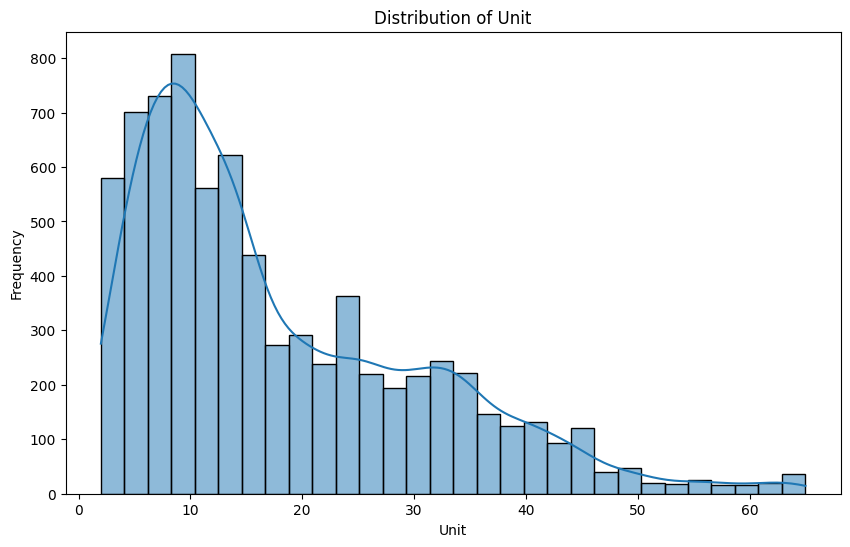

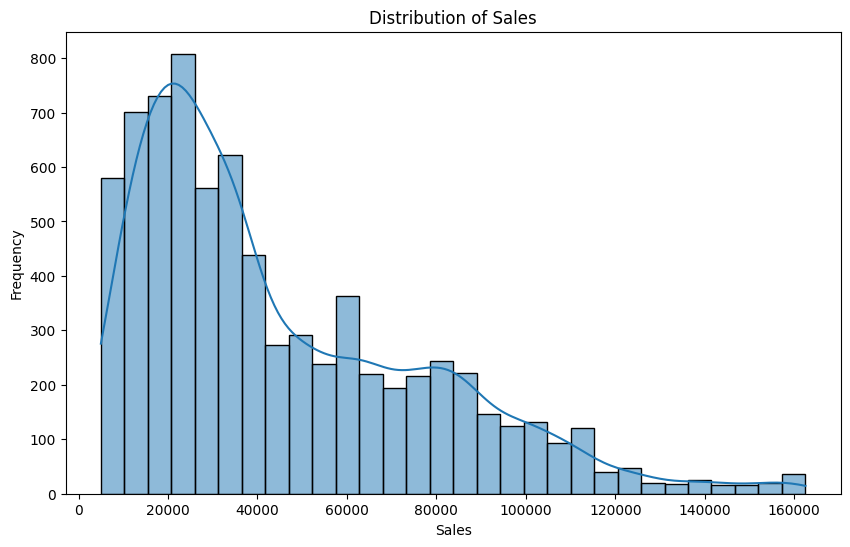

In [70]:

#visualise the distribution of the columns
def plot_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for col in df.select_dtypes(include=[np.number]).columns:
    plot_distribution(df, col)


Although Sales column could be **log normalised**, we have an  
**interesting observation** Sales and Unit column look **highly correlated**.

In [71]:
# visualise correlation between numerical columns
df[df.select_dtypes(include=[np.number]).columns].corr()



,Unit,Sales
Unit,1.0,1.0
Sales,1.0,1.0



Recommend Performing **Feature Selection** by **Dropping** Sales column and **Renaming** Unit to Units Sold for clarity as Sales and Unit column correlation is 1 and Sales is a constant multiple of Unit

In [72]:
#df.drop(columns=['Sales'], inplace=True)  # Drop 'Sales' column as it is not needed for normalization
#df.rename(columns={'Unit': 'Units_Sold'}, inplace=True)  # Rename for consistency
#df.head()

In [73]:
#df.describe()

Transforming date column from object to date

In [84]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


#### **Result 1.c** Although **Sales column** could be **log normalized**, but it is **directly correlated**  with Unit column i.e sales = 2500 per unit, so we recommend **feature selection** to be applied and Sales column be **dropped**.

### d. Apply group_by()

In [75]:
#group by date and time and sum the units sold
df_grouped = df.groupby(['Date','Time']).agg({'Unit': 'sum'}).reset_index()
df_grouped.head()

,Date,Time,Unit
0,2020-10-01,Afternoon,485
1,2020-10-01,Evening,513
2,2020-10-01,Morning,490
3,2020-10-02,Afternoon,510
4,2020-10-02,Evening,465


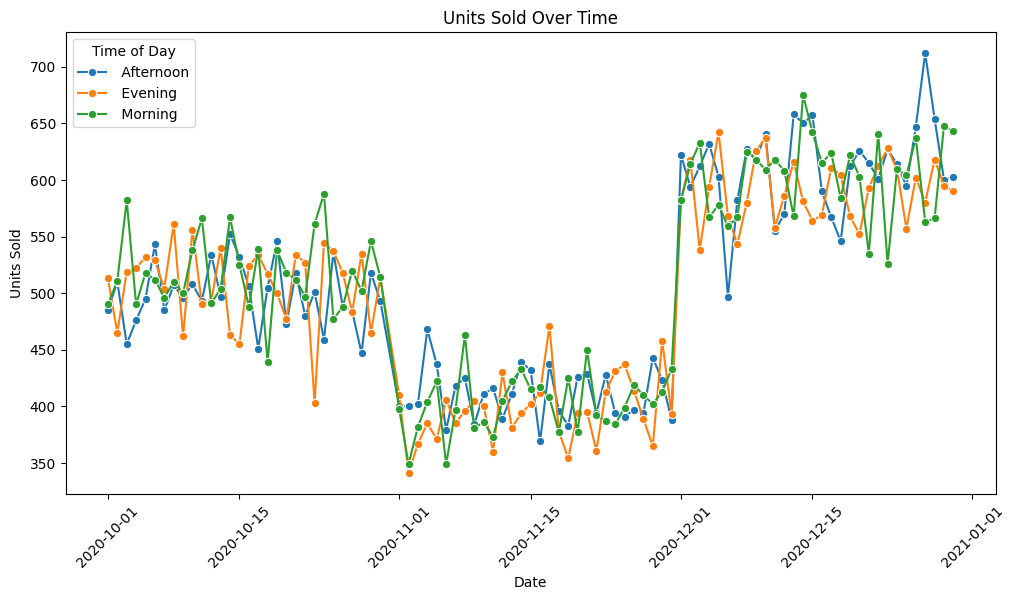

In [76]:
#plot distribution of units sold over date by time of day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Date', y='Unit', hue='Time', marker='o')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.show()

In [77]:
#group by date and group and sum the units sold
df_grouped = df.groupby(['Date', 'Group']).agg({'Unit': 'sum'}).reset_index()
df_grouped.head()


,Date,Group,Unit
0,2020-10-01,Kids,389
1,2020-10-01,Men,347
2,2020-10-01,Seniors,398
3,2020-10-01,Women,354
4,2020-10-02,Kids,369


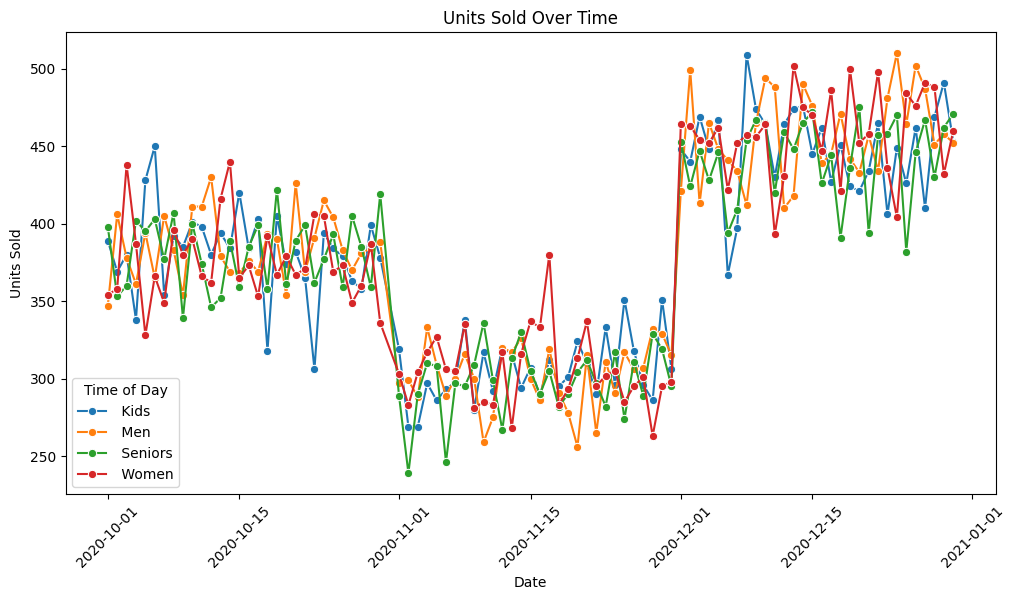

In [78]:
#plot distribution of units sold over date by group
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Date', y='Unit', hue='Group', marker='o')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.show()


In [79]:
#group by date and State and sum the units sold
df_grouped = df.groupby(['Date', 'State']).agg({'Unit': 'sum'}).reset_index()
df_grouped.head()

,Date,State,Unit
0,2020-10-01,NSW,351
1,2020-10-01,NT,104
2,2020-10-01,QLD,159
3,2020-10-01,SA,252
4,2020-10-01,TAS,93


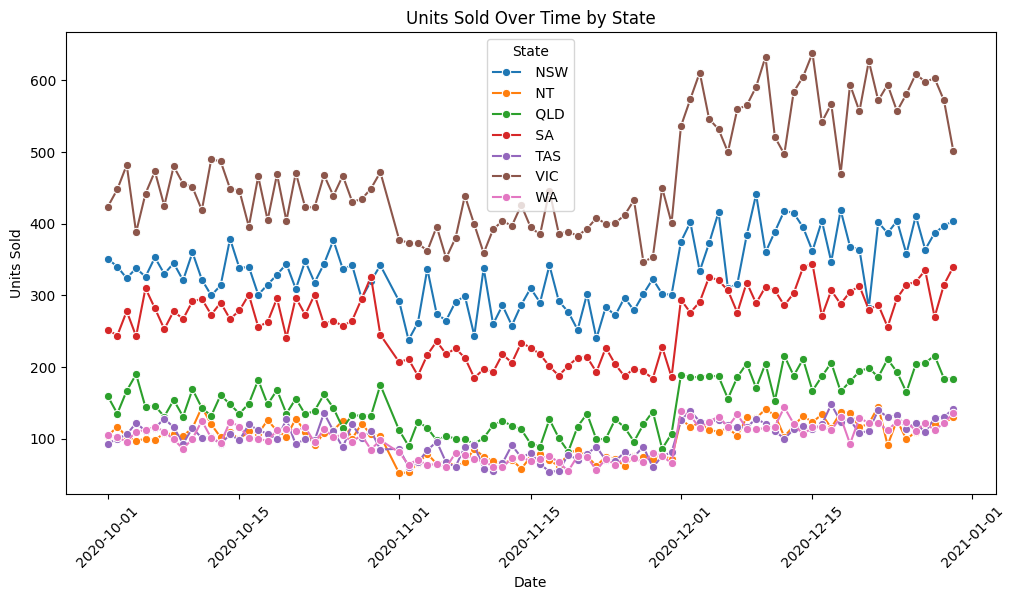

In [80]:
#plot distribution of units sold over date by state
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Date', y='Unit', hue='State', marker='o')
plt.title('Units Sold Over Time by State')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.show()


#### **Result 1.d** by grouping data with date and across Time,Group,State, we can see when grouping across State we can abserve some interesting trend, where some states are doing much better than others. We **recommend** grouping data with date and state to merge them across Group/Time.

## **2.** Data analysis
### a. Discriptive statistical analysis

In [81]:
df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


There are 123 outliers in the dataset based on the IQR method.


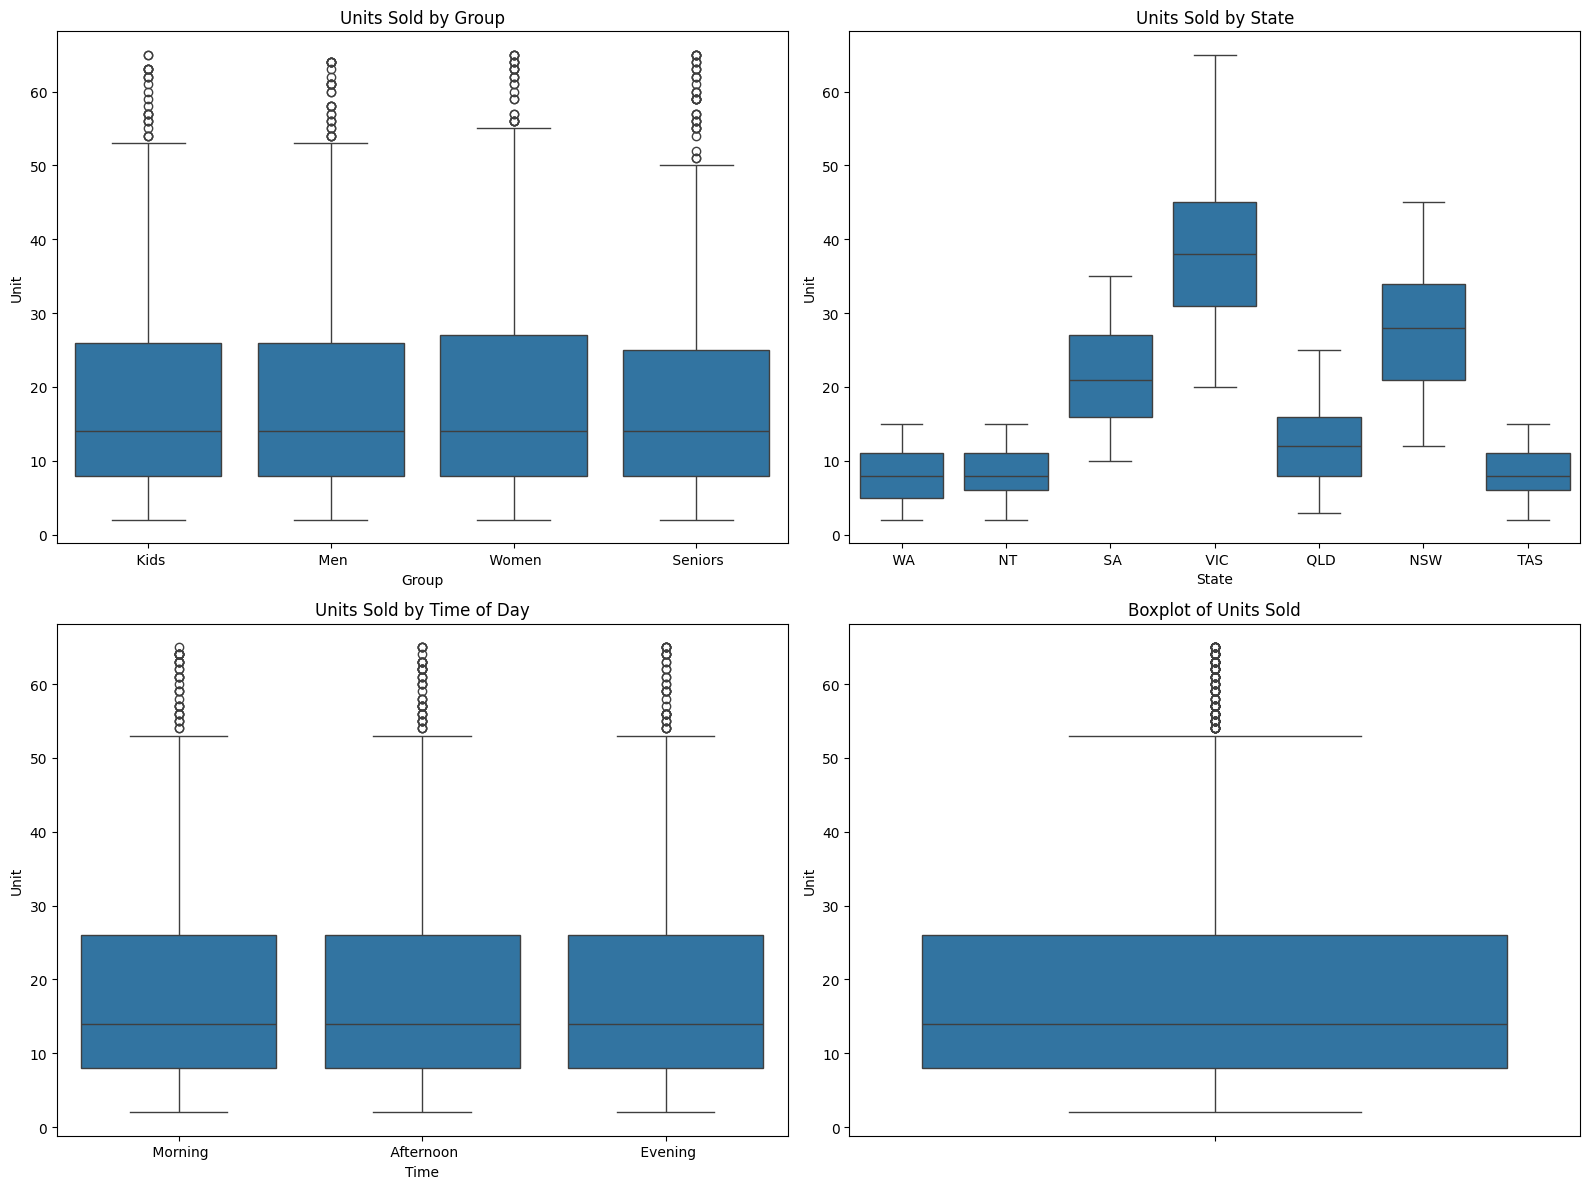

In [97]:
# Check for outliers in the 'Unit' column using IQR method
Q1 = df['Unit'].quantile(0.25)
Q3 = df['Unit'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Unit'] < (Q1 - 1.5 * IQR)) | (df['Unit'] > (Q3 + 1.5 * IQR))]
print(f'There are {outliers.shape[0]} outliers in the dataset based on the IQR method.')

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot(x='Group', y='Unit', data=df, ax=axs[0, 0])
sns.boxplot(x='State', y='Unit', data=df, ax=axs[0, 1])
sns.boxplot(x='Time', y='Unit', data=df, ax=axs[1, 0])
sns.boxplot(y='Unit', data=df, ax=axs[1, 1])
axs[0, 0].set_title('Units Sold by Group')
axs[0, 1].set_title('Units Sold by State')
axs[1, 0].set_title('Units Sold by Time of Day')
axs[1, 1].set_title('Boxplot of Units Sold')
plt.tight_layout()
plt.show()





### b/c. Group with highest ands lowest sales

In [82]:
#cut and slice the table to find the top combination with the highest sales
combinations = df.groupby(['Group', 'State']).agg({'Unit': 'sum'}).reset_index()
top_combinations = combinations.sort_values(by='Unit', ascending=False).head(3)
lowest_combinations = combinations.sort_values(by='Unit', ascending=True).head(3)
print("Top 10 combinations of Group and State with lowest sales:")
print(lowest_combinations)
print("Top 10 combinations of Group and State with highest sales:")
print(top_combinations)

Top 10 combinations of Group and State with lowest sales:
       Group State  Unit
27     Women    WA  2105
15   Seniors    NT  2186
20   Seniors    WA  2205
Top 10 combinations of Group and State with highest sales:
     Group State   Unit
26   Women   VIC  10593
12     Men   VIC  10563
5     Kids   VIC  10544


#### **Result 2.b/c** the best group is Kids in VIC with 10544 units sold and worst grouping is Women in QA with 2105 units sold.

### d.	Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

In [93]:
def generate_pivot_report(df, freq='W'):
    # Set 'Date' as index temporarily for grouping
    df_temp = df.set_index('Date')
    pivot_table = df_temp.pivot_table(
        index=pd.Grouper(freq=freq),
        columns=['Group', 'State'],
        values='Unit',
        aggfunc='sum'
    )
    return pivot_table

# Generate weekly report
weekly_report = generate_pivot_report(df, freq='W')
# Generate monthly report
monthly_report = generate_pivot_report(df, freq='M')
# Generate quarterly report
quarterly_report = generate_pivot_report(df, freq='Q')
# Display the reports
print("Weekly Report:")
display(weekly_report)
print("Monthly Report:")
display(monthly_report)
print("Quarterly Report:")
display(quarterly_report)




Weekly Report:


C:\Users\prate\AppData\Local\Temp\ipykernel_5784\2818158233.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.Grouper(freq=freq),
C:\Users\prate\AppData\Local\Temp\ipykernel_5784\2818158233.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  index=pd.Grouper(freq=freq),


Group      Kids                                 Men            ... Seniors  \
State       NSW   NT  QLD   SA  TAS   VIC   WA  NSW   NT  QLD  ...     TAS   
Date                                                           ...           
2020-10-04  347  111  166  201   95   457   99  335  100  168  ...     114   
2020-10-11  656  207  249  499  205   810  182  597  198  259  ...     182   
2020-10-18  570  200  283  461  199   765  205  540  198  281  ...     179   
2020-10-25  574  175  243  483  201   752  182  646  206  257  ...     200   
2020-11-01  455  177  230  404  149   644  137  465  155  202  ...     154   
2020-11-08  474  119  180  388  123   634  132  509  121  192  ...     120   
2020-11-15  528  107  181  326  129   742  113  474  130  192  ...     135   
2020-11-22  471  134  199  337  133   736  111  489  118  192  ...     125   
2020-11-29  516  136  198  375  154   696  156  577  121  169  ...     135   
2020-12-06  672  196  274  471  211   907  214  622  190  297  ...     197   
2020-12-13  656  188  368  577  199   990  234  660  220  315  ...     208   
2020-12-20  604  216  361  542  205   978  200  691  236  323  ...     207   
2020-12-27  610  191  341  505  208  1004  193  694  232  360  ...     201   
2021-01-03  302  123  131  237   99   429   92  310   80  150  ...     103   

Group                 Women                                 
State        VIC   WA   NSW   NT  QLD   SA  TAS   VIC   WA  
Date                                                        
2020-10-04   403  105   376   94  141  266  103   465   92  
2020-10-11   823  178   604  152  233  459  196   751  180  
2020-10-18   780  197   604  230  264  493  163   787  160  
2020-10-25   778  209   586  191  277  476  180   794  160  
2020-11-01   640  131   499  142  181  364  138   644  140  
2020-11-08   658  105   496  117  191  392  139   724  118  
2020-11-15   691  139   474  141  196  367  119   670  120  
2020-11-22   689  122   552  142  169  398  125   724  124  
2020-11-29   680  112   446  118  221  349  118   698   96  
2020-12-06   875  204   651  195  297  515  209   958  190  
2020-12-13  1060  213   762  239  319  506  186   931  212  
2020-12-20   990  196   657  230  330  605  232   988  209  
2020-12-27  1035  203   678  192  345  563  222  1039  208  
2021-01-03   424   91   284   78  166  235  101   420   96  

[14 rows x 28 columns]

Monthly Report:


Group       Kids                                    Men             ...  \
State        NSW   NT   QLD    SA  TAS   VIC   WA   NSW   NT   QLD  ...   
Date                                                                ...   
2020-10-31  2536  856  1135  1996  820  3325  786  2508  849  1142  ...   
2020-11-30  2125  533   817  1524  589  3017  548  2196  512   793  ...   
2020-12-31  2774  891  1452  2286  901  4202  916  2905  944  1422  ...   

Group      Seniors            Women                                   
State          TAS   VIC   WA   NSW   NT   QLD    SA  TAS   VIC   WA  
Date                                                                  
2020-10-31     809  3347  795  2593  796  1062  2001  763  3350  717  
2020-11-30     554  2893  518  2130  554   837  1607  535  2994  488  
2020-12-31     897  4286  892  2946  911  1431  2380  933  4249  900  

[3 rows x 28 columns]

Quarterly Report:


Group       Kids                                        Men              ...  \
State        NSW    NT   QLD    SA   TAS    VIC    WA   NSW    NT   QLD  ...   
Date                                                                     ...   
2020-12-31  7435  2280  3404  5806  2310  10544  2250  7609  2305  3357  ...   

Group      Seniors              Women                                       
State          TAS    VIC    WA   NSW    NT   QLD    SA   TAS    VIC    WA  
Date                                                                        
2020-12-31    2260  10526  2205  7669  2261  3330  5988  2231  10593  2105  

[1 rows x 28 columns]

## **3.** Data visualization
### a. construct a dashboard for the head of sales and marketing

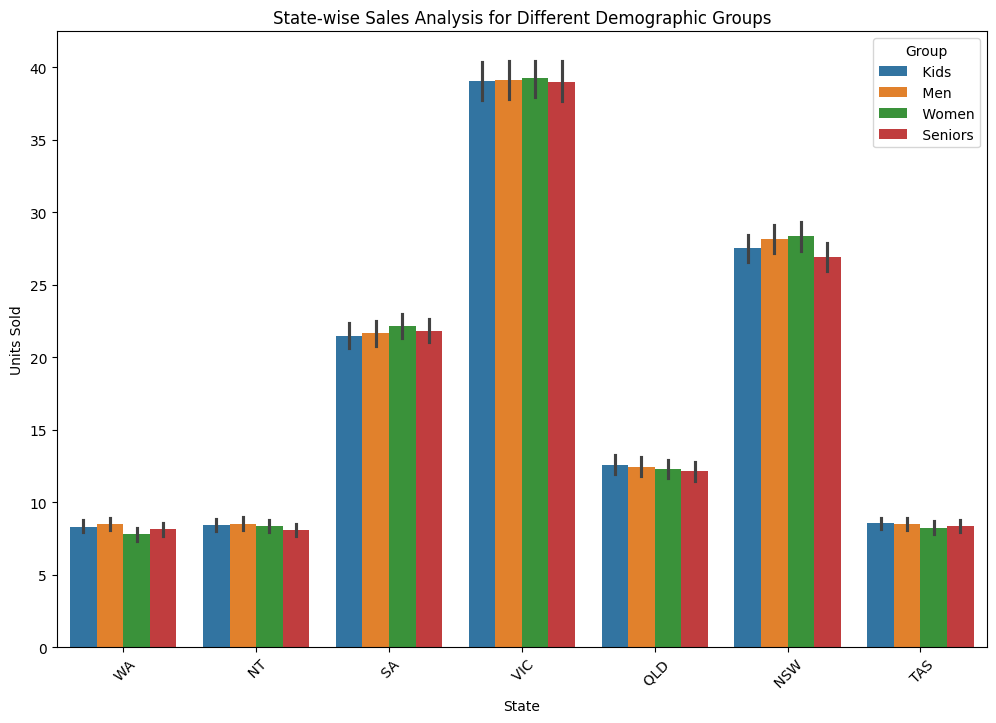

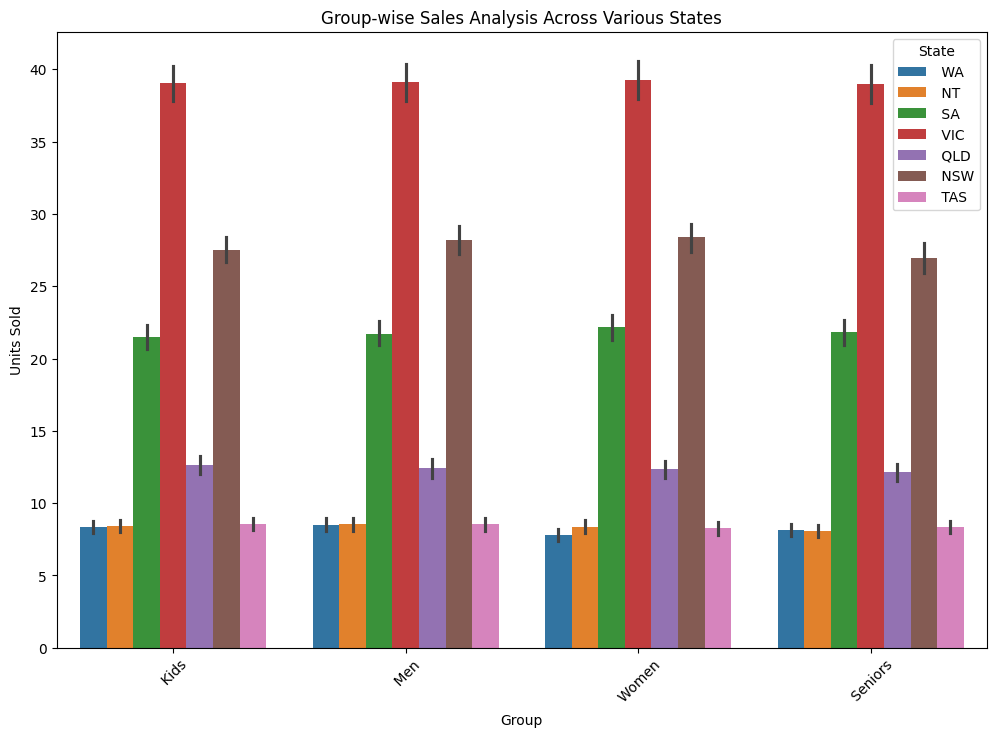

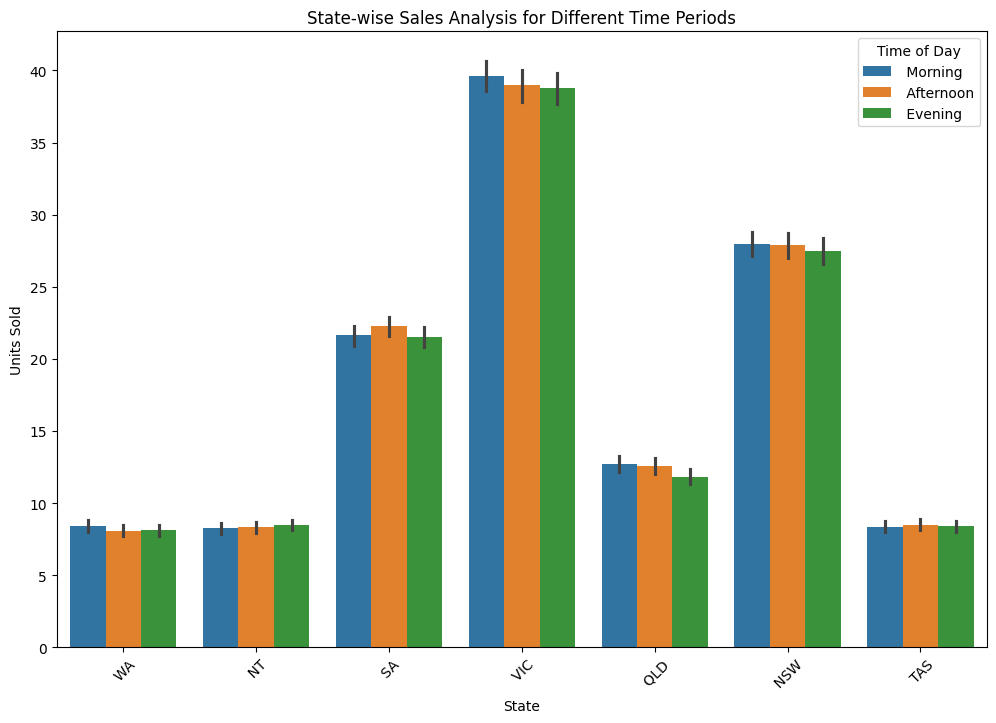

In [87]:
#construct a dashboard for the head of sales and marketing
#state-wise sales analysis for different demographic groups 
def state_wise_sales_analysis(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='State', y='Unit', hue='Group')
    plt.title('State-wise Sales Analysis for Different Demographic Groups')
    plt.xlabel('State')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45)
    plt.legend(title='Group')
    plt.show()
state_wise_sales_analysis(df)
#Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
def group_wise_sales_analysis(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Group', y='Unit', hue='State')
    plt.title('Group-wise Sales Analysis Across Various States')
    plt.xlabel('Group')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45)
    plt.legend(title='State')
    plt.show()
group_wise_sales_analysis(df)
#state-wise sales analysis for different time periods (morning, afternoon, evening).
def time_period_sales_analysis(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='State', y='Unit', hue='Time')
    plt.title('State-wise Sales Analysis for Different Time Periods')
    plt.xlabel('State')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45)
    plt.legend(title='Time of Day')
    plt.show()
time_period_sales_analysis(df)

#### **Result 3.a** Dashboard little vcariance in data with respect to groupings except by State.

### b. construct a dashboard for daily    weekly monthly and quarterly charts

C:\Users\prate\AppData\Local\Temp\ipykernel_5784\875714594.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date').agg({'Unit': 'sum'}).reset_index()
C:\Users\prate\AppData\Local\Temp\ipykernel_5784\875714594.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample('Q', on='Date').agg({'Unit': 'sum'}).reset_index()


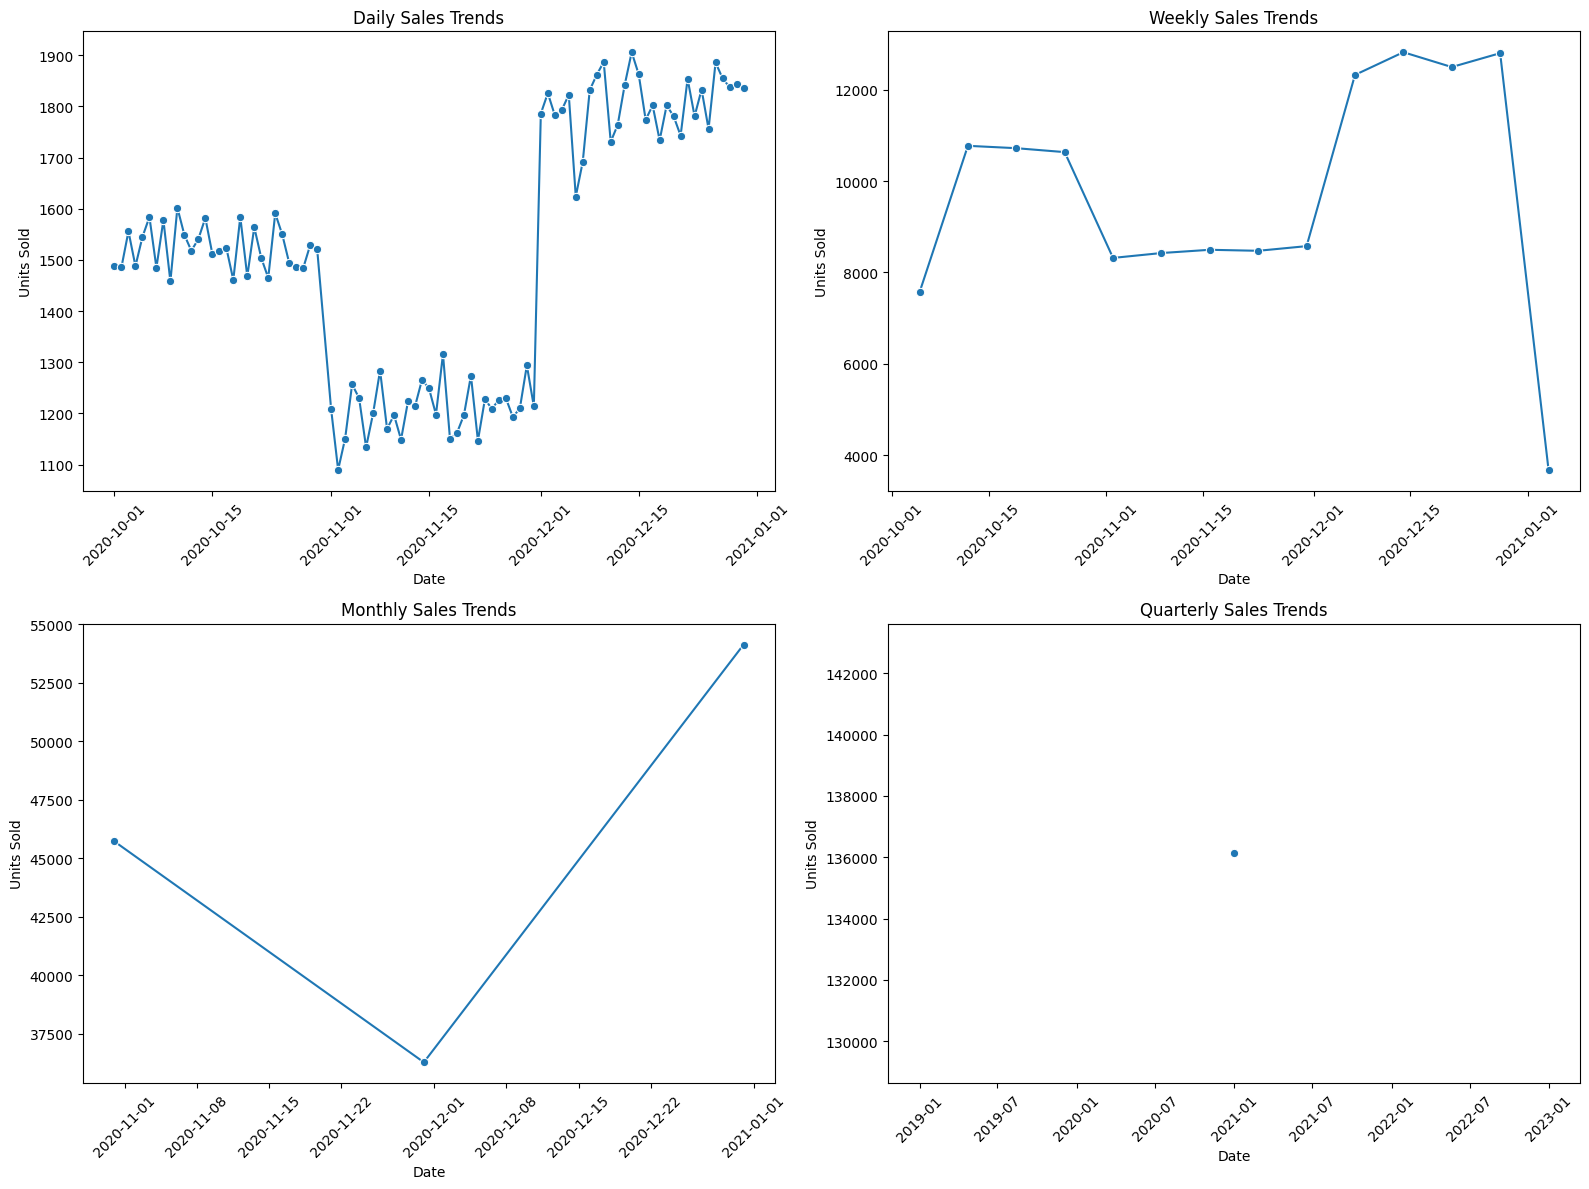

In [91]:
#Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
#The dashboard must contain daily, weekly, monthly, and quarterly charts.
# Generate daily, weekly, monthly, and quarterly sales trends
def generate_sales_trends(df):
    daily_sales = df.groupby('Date').agg({'Unit': 'sum'}).reset_index()
    weekly_sales = df.resample('W-Mon', on='Date').agg({'Unit': 'sum'}).reset_index()
    monthly_sales = df.resample('M', on='Date').agg({'Unit': 'sum'}).reset_index()
    quarterly_sales = df.resample('Q', on='Date').agg({'Unit': 'sum'}).reset_index()

    return daily_sales, weekly_sales, monthly_sales, quarterly_sales
daily_sales, weekly_sales, monthly_sales, quarterly_sales = generate_sales_trends(df)
def plot_all_sales_trends(daily, weekly, monthly, quarterly):
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    
    sns.lineplot(data=daily, x='Date', y='Unit', marker='o', ax=axs[0, 0])
    axs[0, 0].set_title('Daily Sales Trends')
    axs[0, 0].set_xlabel('Date')
    axs[0, 0].set_ylabel('Units Sold')
    axs[0, 0].tick_params(axis='x', rotation=45)

    sns.lineplot(data=weekly, x='Date', y='Unit', marker='o', ax=axs[0, 1])
    axs[0, 1].set_title('Weekly Sales Trends')
    axs[0, 1].set_xlabel('Date')
    axs[0, 1].set_ylabel('Units Sold')
    axs[0, 1].tick_params(axis='x', rotation=45)

    sns.lineplot(data=monthly, x='Date', y='Unit', marker='o', ax=axs[1, 0])
    axs[1, 0].set_title('Monthly Sales Trends')
    axs[1, 0].set_xlabel('Date')
    axs[1, 0].set_ylabel('Units Sold')
    axs[1, 0].tick_params(axis='x', rotation=45)

    sns.lineplot(data=quarterly, x='Date', y='Unit', marker='o', ax=axs[1, 1])
    axs[1, 1].set_title('Quarterly Sales Trends')
    axs[1, 1].set_xlabel('Date')
    axs[1, 1].set_ylabel('Units Sold')
    axs[1, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
plot_all_sales_trends(daily_sales, weekly_sales, monthly_sales, quarterly_sales)
# Generate a summary report for the head of sales and marketing
def generate_summary_report(df):
    total_units_sold = df['Unit'].sum()
    total_sales_by_group = df.groupby('Group')['Unit'].sum().reset_index()
    total_sales_by_state = df.groupby('State')['Unit'].sum().reset_index()
    
    summary = {
        'Total Units Sold': total_units_sold,
        'Total Sales by Group': total_sales_by_group,
        'Total Sales by State': total_sales_by_state
    }
    
    return summary





#### **Result 3.c** Choose seaborn over Mathplotlib as it has better color schemes, and works better for statistical plots.

## **4.** Report Generation

## Sales Analysis Report & Recommendations for Low Sales States

### Executive Summary

Analysis of AAL's fourth-quarter sales data reveals significant variation in performance across Australian states and demographic groups. The data-driven insights below highlight the highest and lowest-performing states, with targeted recommendations for improving sales in underperforming regions.

---

### Key Findings

- **Top Performing State:** Victoria (VIC) consistently leads in total units sold across all demographic groups.
- **Lowest Performing States:** Western Australia (WA) and Northern Territory (NT) have the lowest sales figures, especially for the Women and Seniors groups.

#### Lowest Sales Combinations (Units Sold)
| Group   | State | Units Sold |
|---------|-------|------------|
| Women   | WA    | 2,105      |
| Seniors | NT    | 2,186      |
| Seniors | WA    | 2,205      |

#### Highest Sales Combinations (Units Sold)
| Group   | State | Units Sold |
|---------|-------|------------|
| Women   | VIC   | 10,593     |
| Men     | VIC   | 10,563     |
| Kids    | VIC   | 10,544     |

---

### Recommendations for Low Sales States

#### 1. **Western Australia (WA)**
- **Observation:** WA has the lowest sales for Women (2,105 units) and low sales for Seniors (2,205 units).
- **Recommendation:**  
    - **Targeted Promotions:** Launch marketing campaigns focused on Women and Seniors, such as loyalty programs, discounts, or exclusive product lines.
    - **Local Partnerships:** Collaborate with local influencers or community groups to increase brand visibility.
    - **Product Mix Review:** Assess if the current product offerings align with the preferences of Women and Seniors in WA.

#### 2. **Northern Territory (NT)**
- **Observation:** NT shows low sales, especially for Seniors (2,186 units) and Kids (2,280 units).
- **Recommendation:**  
    - **Community Engagement:** Organize events or pop-up stores in key locations to boost brand awareness.
    - **Demographic-Specific Offers:** Introduce special bundles or promotions for Seniors and families with children.
    - **Market Research:** Conduct surveys to understand barriers to purchase and tailor strategies accordingly.

---

### Additional Insights

- **Sales are highly correlated with units sold** (Sales = 2,500 × Units), so focusing on increasing unit sales will directly impact revenue.
- **No missing or duplicate data** was found, ensuring reliability of the analysis.
- **Sales trends** show consistent underperformance in WA and NT across all time periods (weekly, monthly, quarterly).

---

### Conclusion

To drive growth in underperforming states, AAL should implement targeted, data-driven marketing and engagement strategies, focusing on the specific demographic groups identified. Continuous monitoring and adaptation of these strategies will be essential for improving sales performance in WA and NT.